<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/timeseries_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: fake를 사용하여 10개의 서로다른 지역의 주소와  1개월동안의  온도를 보여주는 시계열데이터를 생성하라

# !pip install faker

import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

fake = Faker('ko_KR') # 한국어 로케일 설정

def generate_timeseries_data(num_locations=10, duration_days=30):
  """
  가짜 데이터를 사용하여 시계열 데이터를 생성합니다.

  Args:
    num_locations: 생성할 지역의 수
    duration_days: 시계열 데이터 기간 (일)

  Returns:
    DataFrame: 생성된 시계열 데이터
  """
  data = []
  locations = [fake.address() for _ in range(num_locations)]
  start_date = datetime.now() - timedelta(days=duration_days - 1)

  for loc in locations:
    for i in range(duration_days):
      current_date = start_date + timedelta(days=i)
      # 임의의 온도 데이터 생성 (예: 0도에서 30도 사이)
      temperature = round(np.random.uniform(0, 30), 1)
      data.append([loc, current_date.strftime('%Y-%m-%d'), temperature])

  df = pd.DataFrame(data, columns=['Location', 'Date', 'Temperature'])
  return df

# 데이터 생성 및 출력
timeseries_df = generate_timeseries_data()
timeseries_df


,Location,Date,Temperature
0,대전광역시 강서구 양재천가 72 (정훈김동),2025-06-16,25.0
1,대전광역시 강서구 양재천가 72 (정훈김동),2025-06-17,9.0
2,대전광역시 강서구 양재천가 72 (정훈김동),2025-06-18,16.4
3,대전광역시 강서구 양재천가 72 (정훈김동),2025-06-19,25.6
4,대전광역시 강서구 양재천가 72 (정훈김동),2025-06-20,29.0
...,...,...,...
295,강원도 동두천시 양재천길 685-96,2025-07-11,28.4
296,강원도 동두천시 양재천길 685-96,2025-07-12,0.9
297,강원도 동두천시 양재천길 685-96,2025-07-13,0.5
298,강원도 동두천시 양재천길 685-96,2025-07-14,27.6


In [ ]:
# prompt: timeseries_df의 데이터를  long to wide 변경해줘

timeseries_wide_df = timeseries_df.pivot(index='Date', columns='Location', values='Temperature')
timeseries_wide_df.columns.name = None # 컬럼 이름에 붙는 'Location' 제거
timeseries_wide_df = timeseries_wide_df.reset_index() # 'Date'를 컬럼으로 다시 가져오기
timeseries_wide_df.head()

,Date,강원도 동두천시 양재천길 685-96,경상남도 보령시 반포대35거리 지하376,경상북도 인제군 영동대321길 573 (영순고마을),대구광역시 성동구 서초대길 548-4,대전광역시 강서구 양재천가 72 (정훈김동),서울특별시 용산구 서초대56길 514-74 (도현박동),세종특별자치시 양천구 잠실로 282 (성현노김읍),전라북도 보령시 가락거리 264 (경희박곽읍),충청남도 용인시 기흥구 반포대거리 654 (옥자류김동),충청북도 삼척시 봉은사가 92-47 (영수김마을)
0,2025-06-16,18.0,27.1,12.5,20.4,25.0,25.7,18.4,16.9,19.7,9.4
1,2025-06-17,26.9,6.7,23.4,11.7,9.0,7.7,2.2,10.4,10.6,6.8
2,2025-06-18,29.0,12.5,0.1,1.6,16.4,17.5,15.9,25.5,11.8,4.9
3,2025-06-19,22.2,18.7,0.8,7.0,25.6,14.0,3.6,12.6,27.9,24.6
4,2025-06-20,3.6,13.4,0.2,23.1,29.0,23.9,12.6,4.1,3.5,29.9


In [ ]:
df = timeseries_wide_df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,2025-06-25,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
강원도 동두천시 양재천길 685-96,18.0,26.9,29.0,22.2,3.6,14.9,5.5,13.7,2.6,0.0,...,16.4,18.6,1.7,2.3,8.9,28.4,0.9,0.5,27.6,10.1
경상남도 보령시 반포대35거리 지하376,27.1,6.7,12.5,18.7,13.4,19.0,28.1,9.2,20.4,24.2,...,9.8,12.6,18.8,7.9,21.2,0.7,14.5,16.5,13.9,22.4
경상북도 인제군 영동대321길 573 (영순고마을),12.5,23.4,0.1,0.8,0.2,9.4,7.0,5.6,21.3,16.8,...,2.7,10.9,16.2,14.5,14.1,5.0,21.0,23.1,29.3,24.2
대구광역시 성동구 서초대길 548-4,20.4,11.7,1.6,7.0,23.1,1.8,24.0,12.4,18.8,18.2,...,25.0,11.5,15.0,9.2,3.6,3.9,6.6,8.5,1.4,22.5


In [ ]:
# prompt: df 인덱스를 컬럼으로하고 첫번쨰 행을 컬럼명으로

df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,Date,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
0,강원도 동두천시 양재천길 685-96,18.0,26.9,29.0,22.2,3.6,14.9,5.5,13.7,2.6,...,16.4,18.6,1.7,2.3,8.9,28.4,0.9,0.5,27.6,10.1
1,경상남도 보령시 반포대35거리 지하376,27.1,6.7,12.5,18.7,13.4,19.0,28.1,9.2,20.4,...,9.8,12.6,18.8,7.9,21.2,0.7,14.5,16.5,13.9,22.4
2,경상북도 인제군 영동대321길 573 (영순고마을),12.5,23.4,0.1,0.8,0.2,9.4,7.0,5.6,21.3,...,2.7,10.9,16.2,14.5,14.1,5.0,21.0,23.1,29.3,24.2
3,대구광역시 성동구 서초대길 548-4,20.4,11.7,1.6,7.0,23.1,1.8,24.0,12.4,18.8,...,25.0,11.5,15.0,9.2,3.6,3.9,6.6,8.5,1.4,22.5
4,대전광역시 강서구 양재천가 72 (정훈김동),25.0,9.0,16.4,25.6,29.0,21.2,8.5,15.9,29.5,...,25.7,23.8,29.5,19.7,8.1,8.7,2.0,18.5,7.9,16.9


In [ ]:
# prompt: Date 컬럼명을 Adrress로 변경

df = df.rename(columns={'Date': 'Address'})
df

,Address,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
0,강원도 동두천시 양재천길 685-96,18.0,26.9,29.0,22.2,3.6,14.9,5.5,13.7,2.6,...,16.4,18.6,1.7,2.3,8.9,28.4,0.9,0.5,27.6,10.1
1,경상남도 보령시 반포대35거리 지하376,27.1,6.7,12.5,18.7,13.4,19.0,28.1,9.2,20.4,...,9.8,12.6,18.8,7.9,21.2,0.7,14.5,16.5,13.9,22.4
2,경상북도 인제군 영동대321길 573 (영순고마을),12.5,23.4,0.1,0.8,0.2,9.4,7.0,5.6,21.3,...,2.7,10.9,16.2,14.5,14.1,5.0,21.0,23.1,29.3,24.2
3,대구광역시 성동구 서초대길 548-4,20.4,11.7,1.6,7.0,23.1,1.8,24.0,12.4,18.8,...,25.0,11.5,15.0,9.2,3.6,3.9,6.6,8.5,1.4,22.5
4,대전광역시 강서구 양재천가 72 (정훈김동),25.0,9.0,16.4,25.6,29.0,21.2,8.5,15.9,29.5,...,25.7,23.8,29.5,19.7,8.1,8.7,2.0,18.5,7.9,16.9
5,서울특별시 용산구 서초대56길 514-74 (도현박동),25.7,7.7,17.5,14.0,23.9,9.0,21.7,8.3,17.3,...,3.4,10.1,18.1,24.5,0.7,5.1,6.7,20.3,8.3,28.5
6,세종특별자치시 양천구 잠실로 282 (성현노김읍),18.4,2.2,15.9,3.6,12.6,26.9,29.0,26.0,12.9,...,26.2,18.3,10.9,6.3,19.0,6.8,24.3,29.4,12.4,16.8
7,전라북도 보령시 가락거리 264 (경희박곽읍),16.9,10.4,25.5,12.6,4.1,9.7,22.3,27.8,15.4,...,4.5,17.9,23.3,4.1,21.2,28.3,26.2,17.0,9.8,1.9
8,충청남도 용인시 기흥구 반포대거리 654 (옥자류김동),19.7,10.6,11.8,27.9,3.5,7.6,9.5,10.8,7.0,...,19.1,2.9,8.0,7.2,28.4,14.9,28.5,25.6,0.9,4.2
9,충청북도 삼척시 봉은사가 92-47 (영수김마을),9.4,6.8,4.9,24.6,29.9,24.6,5.0,9.7,19.8,...,12.5,29.0,15.9,15.4,5.4,18.4,15.8,29.3,3.1,28.4


In [ ]:
# prompt: df 의  행을 임의로 3개 선택하여 Nan을 5개에서 10개로 이어서 임의로 만들어라

import numpy as np

# Choose 3 random rows
random_rows_indices = np.random.choice(df.index, size=3, replace=False)

for row_index in random_rows_indices:
  # Choose a random number of NaNs between 5 and 10
  num_nans = np.random.randint(5, 11)
  # Choose random starting column index (excluding the first 'Address' column)
  start_col_index = np.random.randint(1, df.shape[1] - num_nans + 1)
  # Replace the values with NaN
  df.iloc[row_index, start_col_index : start_col_index + num_nans] = np.nan

df

,Address,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
0,강원도 동두천시 양재천길 685-96,18.0,26.9,29.0,22.2,3.6,14.9,5.5,NaN,NaN,...,16.4,18.6,1.7,2.3,8.9,28.4,0.9,0.5,27.6,10.1
1,경상남도 보령시 반포대35거리 지하376,27.1,6.7,12.5,18.7,13.4,19.0,28.1,9.2,20.4,...,9.8,12.6,18.8,7.9,21.2,0.7,14.5,16.5,13.9,22.4
2,경상북도 인제군 영동대321길 573 (영순고마을),NaN,NaN,NaN,NaN,NaN,9.4,7.0,5.6,21.3,...,2.7,10.9,16.2,14.5,14.1,5.0,21.0,23.1,29.3,24.2
3,대구광역시 성동구 서초대길 548-4,20.4,11.7,1.6,7.0,23.1,1.8,24.0,12.4,18.8,...,NaN,NaN,NaN,NaN,NaN,3.9,6.6,8.5,1.4,22.5
4,대전광역시 강서구 양재천가 72 (정훈김동),25.0,9.0,16.4,25.6,29.0,21.2,8.5,15.9,29.5,...,25.7,23.8,29.5,19.7,8.1,8.7,2.0,18.5,7.9,16.9
5,서울특별시 용산구 서초대56길 514-74 (도현박동),25.7,7.7,17.5,14.0,23.9,9.0,21.7,8.3,17.3,...,3.4,10.1,18.1,24.5,0.7,5.1,6.7,20.3,8.3,28.5
6,세종특별자치시 양천구 잠실로 282 (성현노김읍),18.4,2.2,15.9,3.6,12.6,26.9,29.0,26.0,12.9,...,26.2,18.3,10.9,6.3,19.0,6.8,24.3,29.4,12.4,16.8
7,전라북도 보령시 가락거리 264 (경희박곽읍),16.9,10.4,25.5,12.6,4.1,9.7,22.3,27.8,15.4,...,4.5,17.9,23.3,4.1,21.2,28.3,26.2,17.0,9.8,1.9
8,충청남도 용인시 기흥구 반포대거리 654 (옥자류김동),19.7,10.6,11.8,27.9,3.5,7.6,9.5,10.8,7.0,...,19.1,2.9,8.0,7.2,28.4,14.9,28.5,25.6,0.9,4.2
9,충청북도 삼척시 봉은사가 92-47 (영수김마을),9.4,6.8,4.9,24.6,29.9,24.6,5.0,9.7,19.8,...,12.5,29.0,15.9,15.4,5.4,18.4,15.8,29.3,3.1,28.4


Text(0.5, 1.0, 'Missing Values Matrix')

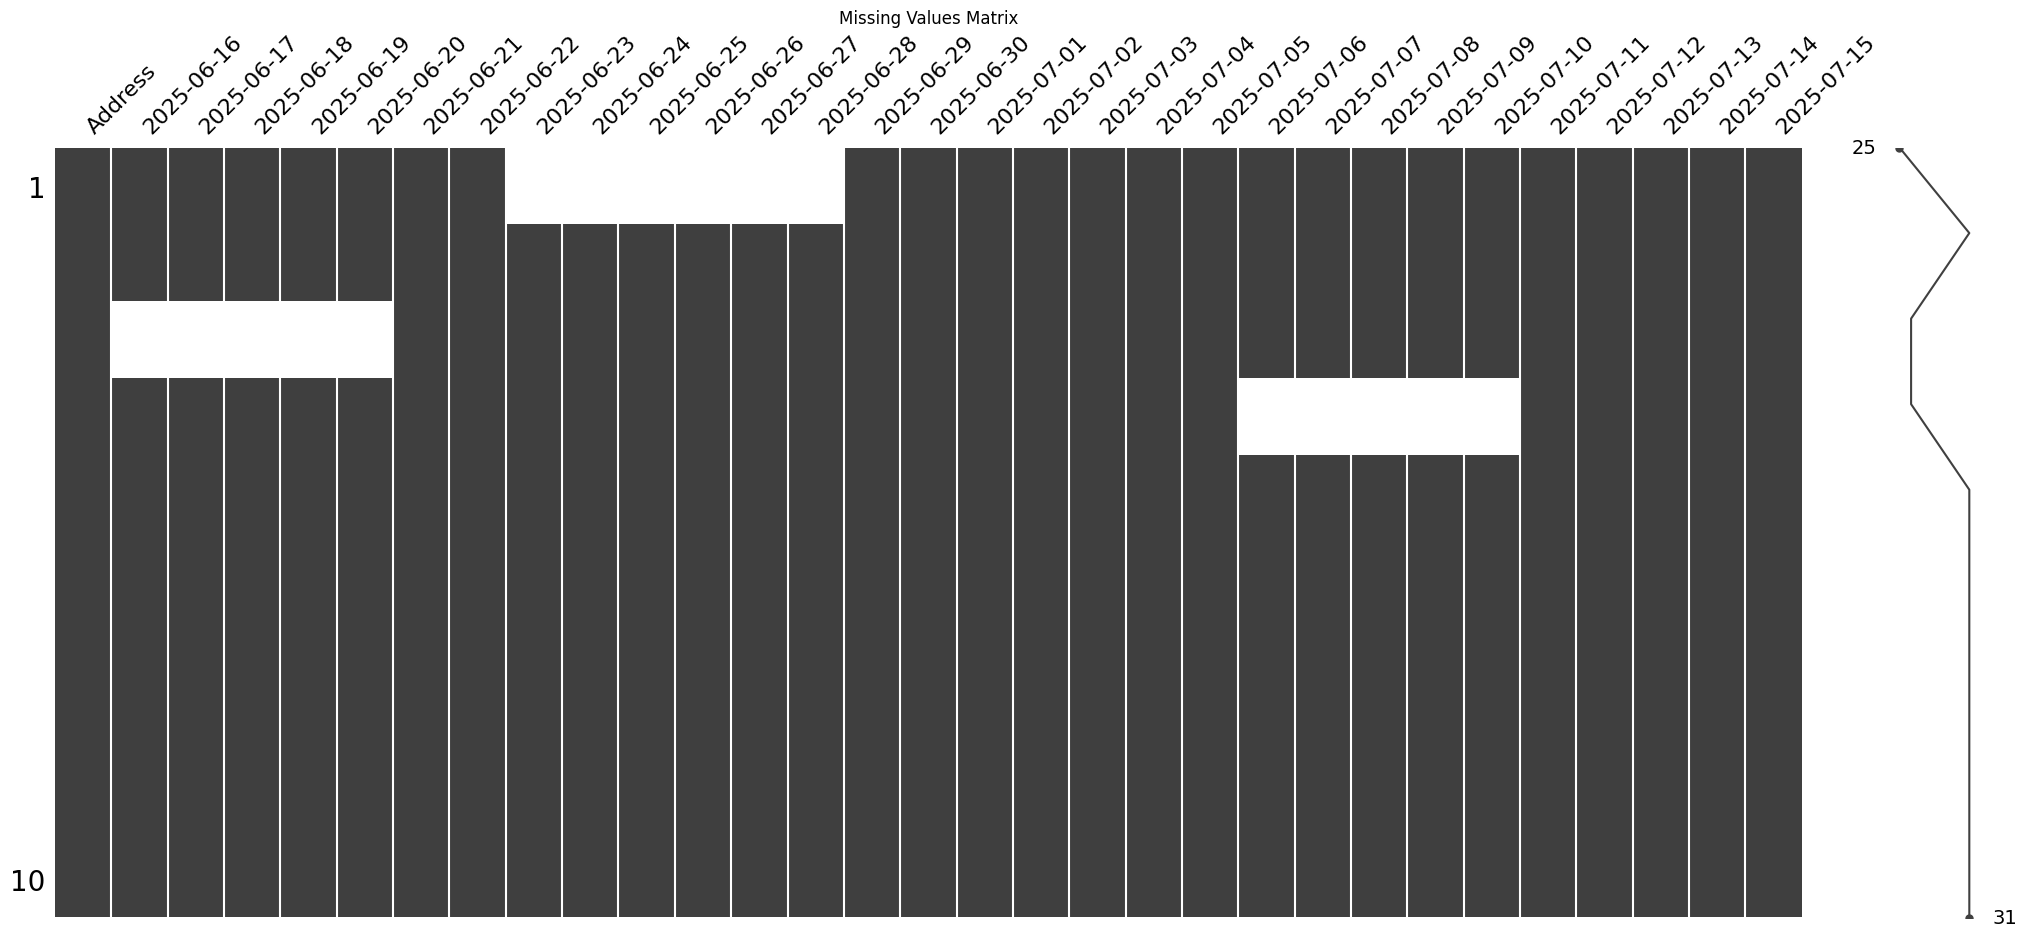

In [ ]:
# prompt: Nan을 시각화


import missingno as msno
import matplotlib.pyplot as plt

# 결측치 시각화
msno.matrix(df)
plt.title('Missing Values Matrix')

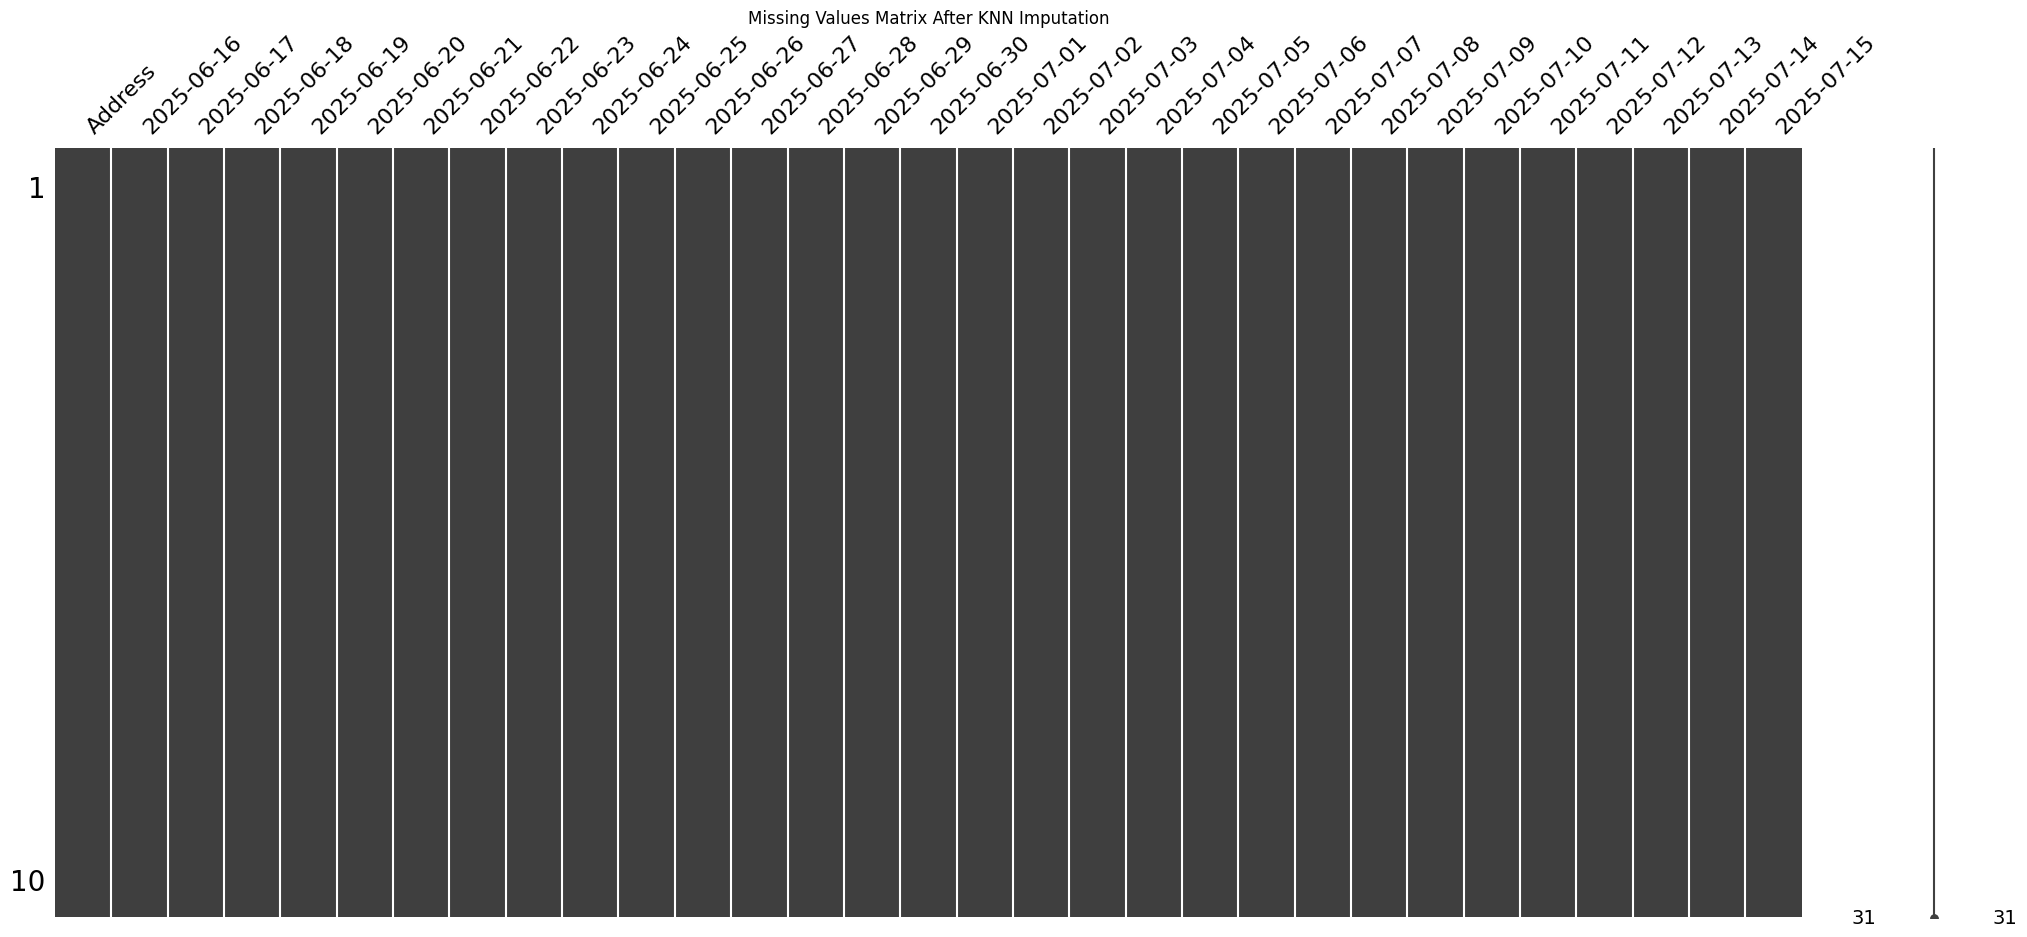

In [ ]:
# prompt: Nan을 nearest neighbor 알고리즘으로 체워라

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Prepare the data for KNN Imputation
# We need to drop the 'Address' column for the imputer
df_numeric = df.drop('Address', axis=1)

# Convert to numeric, coercing errors to NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')


# Create a KNNImputer instance
# n_neighbors is the number of neighbors to consider for imputation
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the numeric data and transform it
df_filled_numeric = imputer.fit_transform(df_numeric)

# Convert the result back to a DataFrame
df_filled = pd.DataFrame(df_filled_numeric, columns=df_numeric.columns, index=df_numeric.index)

# Add the 'Address' column back to the DataFrame
df_filled.insert(0, 'Address', df['Address'])

# Display the filled DataFrame
df_filled

# Check for remaining missing values (should be none in the numeric part)
msno.matrix(df_filled)
plt.title('Missing Values Matrix After KNN Imputation')
plt.show()

In [ ]:
df_filled.isnull().sum()

,0
0,
Address,0
2025-06-16,0
2025-06-17,0
2025-06-18,0
2025-06-19,0
2025-06-20,0
2025-06-21,0
2025-06-22,0
2025-06-23,0


In [ ]:
df_filled.head()

,Address,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
0,강원도 동두천시 양재천길 685-96,18.00,26.90,29.00,22.20,3.60,14.9,5.5,16.9,19.9,...,16.40,18.60,1.7,2.30,8.90,28.4,0.9,0.5,27.6,10.1
1,경상남도 보령시 반포대35거리 지하376,27.10,6.70,12.50,18.70,13.40,19.0,28.1,9.2,20.4,...,9.80,12.60,18.8,7.90,21.20,0.7,14.5,16.5,13.9,22.4
2,경상북도 인제군 영동대321길 573 (영순고마을),21.38,8.16,12.62,22.16,19.94,9.4,7.0,5.6,21.3,...,2.70,10.90,16.2,14.50,14.10,5.0,21.0,23.1,29.3,24.2
3,대구광역시 성동구 서초대길 548-4,20.40,11.70,1.60,7.00,23.10,1.8,24.0,12.4,18.8,...,13.56,15.14,18.7,14.58,12.62,3.9,6.6,8.5,1.4,22.5
4,대전광역시 강서구 양재천가 72 (정훈김동),25.00,9.00,16.40,25.60,29.00,21.2,8.5,15.9,29.5,...,25.70,23.80,29.5,19.70,8.10,8.7,2.0,18.5,7.9,16.9


### 프롬프트
### claude에게
'''
별첨의 데이터를 바탕으로 특정날짜를 입력하면 해당날짜의 과거 5일 동안의 최대치,  최소치,  3일이동평균 값을 각각 컬럼으로 하는 데이터프레임을 파이썬으로 만들어줘

'''

In [ ]:
from datetime import datetime, timedelta

def analyze_date_statistics(df, target_date, date_format='%Y-%m-%d'):
    """
    특정 날짜를 입력하면 해당 날짜의 과거 5일 동안의 최대치, 최소치, 3일 이동평균을 계산

    Parameters:
    - df: 데이터프레임 (첫 번째 컬럼은 Address, 나머지는 날짜별 데이터)
    - target_date: 분석할 기준 날짜 (문자열 형태)
    - date_format: 날짜 형식 (기본값: '%Y-%m-%d')

    Returns:
    - 결과 데이터프레임 (Address, 최대치, 최소치, 3일이동평균)
    """

    # 날짜 컬럼 파싱 및 정렬
    date_columns = []
    for col in df.columns[1:]:  # 첫 번째 컬럼(Address) 제외
        try:
            # 컬럼명에서 날짜 추출 (예: '2025-06-15' 형태)
            if len(col.split('-')) == 3:
                date_columns.append(col)
        except:
            continue

    # 날짜 컬럼을 datetime으로 변환하여 정렬
    date_columns_sorted = sorted(date_columns, key=lambda x: pd.to_datetime(x))

    # 기준 날짜를 datetime으로 변환
    target_datetime = pd.to_datetime(target_date)

    # 기준 날짜 이전 5일간의 날짜 찾기
    past_5_days = []
    for i in range(5):
        past_date = target_datetime - timedelta(days=i)
        past_date_str = past_date.strftime('%Y-%m-%d')
        if past_date_str in date_columns_sorted:
            past_5_days.append(past_date_str)

    if len(past_5_days) < 3:
        raise ValueError(f"기준 날짜 {target_date}로부터 과거 5일 중 최소 3일의 데이터가 필요합니다.")

    # 결과 데이터프레임 생성
    result_df = pd.DataFrame()
    result_df['Address'] = df.iloc[:, 0]  # 첫 번째 컬럼 (주소/지역명)

    # 과거 5일 데이터 추출
    past_data = df[past_5_days]

    # 숫자형 데이터로 변환 (에러 처리 포함)
    past_data_numeric = past_data.apply(pd.to_numeric, errors='coerce')

    # 최대치, 최소치, 3일 이동평균 계산
    result_df['최대치'] = past_data_numeric.max(axis=1)
    result_df['최소치'] = past_data_numeric.min(axis=1)

    # 3일 이동평균 (최근 3일)
    if len(past_5_days) >= 3:
        recent_3_days = past_data_numeric[past_5_days[:3]]  # 최근 3일
        result_df['3일이동평균'] = recent_3_days.mean(axis=1)

    # 분석 기간 정보 추가
    result_df['분석기간'] = f"{past_5_days[-1]} ~ {past_5_days[0]}"

    return result_df.round(2)

# 사용 예시
def example_usage():
    """
    함수 사용 예시
    """
    # 샘플 데이터 생성 (실제 데이터는 CSV 파일을 읽어서 사용)
    sample_data = {
        'Address': ['경기도 수원시 영통구', '경기도 평창군', '경상북도 광주시', '대구광역시 송구', '서울특별시 구로구'],
        '2025-06-10': [13.7, 15.0, 0.1, 23.2, 4.1],
        '2025-06-11': [7.70, 6.80, 16.90, 7.40, 10.54],
        '2025-06-12': [3.3, 27.0, 18.6, 6.5, 21.5],
        '2025-06-13': [19.4, 15.8, 24.8, 1.0, 17.5],
        '2025-06-14': [5.4, 13.1, 2.4, 7.2, 14.1],
        '2025-06-15': [28.4, 29.8, 20.5, 9.9, 18.4]
    }

    df = pd.DataFrame(sample_data)

    # 2025-06-15 기준으로 분석
    result = analyze_date_statistics(df, '2025-06-15')
    print("분석 결과:")
    display(result)

    return result

# 실제 CSV 파일 사용 시
def analyze_from_csv(csv_file_path, target_date):
    """
    CSV 파일을 읽어서 분석하는 함수
    """
    try:
        df = pd.read_csv(csv_file_path)
        result = analyze_date_statistics(df, target_date)
        return result
    except Exception as e:
        print(f"오류 발생: {e}")
        return None

# 예시 실행
if __name__ == "__main__":
    # 샘플 데이터로 테스트
    result = example_usage()

    # CSV 파일 사용 시 (파일 경로를 실제 경로로 변경)
    # result = analyze_from_csv('your_data.csv', '2025-06-15')

분석 결과:


,Address,최대치,최소치,3일이동평균,분석기간
0,경기도 수원시 영통구,28.4,3.30,17.73,2025-06-11 ~ 2025-06-15
1,경기도 평창군,29.8,6.80,19.57,2025-06-11 ~ 2025-06-15
2,경상북도 광주시,24.8,2.40,15.90,2025-06-11 ~ 2025-06-15
3,대구광역시 송구,9.9,1.00,6.03,2025-06-11 ~ 2025-06-15
4,서울특별시 구로구,21.5,10.54,16.67,2025-06-11 ~ 2025-06-15


In [ ]:
# prompt: df_filled에서 7월9일 부터 7월 16일까지 최대치, 최소치, 평균, 분산 등을 데이터프레임으로

import pandas as pd

# The first column is 'Address', the rest are dates.
date_columns = df_filled.columns[1:]

# Convert date column names to datetime objects
date_column_names_dt = pd.to_datetime(date_columns)

# Set the index of the DataFrame to the date column names (as datetime objects)
# Exclude the 'Address' column when setting the index with date column names
df_filled_indexed = df_filled.set_index(df_filled.columns[0])

# Transpose the DataFrame so dates are the index and locations are columns
df_filled_transposed = df_filled_indexed.T

# The first row of the transposed DataFrame contains the addresses.
# We need to set the columns to the addresses and keep the dates as index.
df_filled_transposed.columns = df_filled_transposed.iloc[0]
df_filled_transposed = df_filled_transposed[1:]

# Convert the index to datetime objects for filtering
df_filled_transposed.index = pd.to_datetime(df_filled_transposed.index)


# 7월 9일부터 7월 16일까지의 데이터 필터링
# Adjust the dates based on the actual data in df_filled
start_date = '2025-07-09'
end_date = '2025-07-15' # The data only goes up to 2025-07-15

df_filtered = df_filled_transposed[(df_filled_transposed.index >= start_date) & (df_filled_transposed.index <= end_date)]

# 'Address' 컬럼을 제외한 나머지 컬럼(온도 데이터)에 대해 통계 계산
# In the transposed DataFrame, the columns are now the addresses, and the index is the date.
# We can directly calculate the statistics on the filtered DataFrame.
df_stats = df_filtered.agg(['max', 'min', 'mean', 'var'])

# Transpose the results to have statistics as columns and locations as index
df_stats = df_stats.T


# 컬럼 이름 변경 (선택 사항)
df_stats.columns = ['최대치', '최소치', '평균', '분산']

# 결과 데이터프레임 출력
df_stats

,최대치,최소치,평균,분산
2025-06-16,,,,
18.00,28.4,0.5,11.242857,145.179524
27.10,22.4,0.7,13.871429,57.149048
21.38,29.3,5.0,18.742857,65.622857
20.40,22.5,1.4,10.014286,51.511562
25.00,19.7,2.0,11.685714,44.628095
25.70,28.5,0.7,13.442857,116.649524
18.40,29.4,6.3,16.428571,74.749048
16.90,28.3,1.9,15.500000,110.080000
19.70,28.5,0.9,15.671429,141.219048


In [ ]:
# prompt: df_stats의 인덱스의 값은 무슨 의미인가?
'''
`df_stats` 데이터프레임의 인덱스는 통계치가 계산된 대상 지역의 주소(Address)를 의미합니다.

원래 데이터프레임 `df`에서 각 행이 지역의 시간 경과에 따른 온도 데이터를 나타냈습니다. KNN Imputation을 거쳐 결측치가 채워진 후 `df_filled`가 생성되었습니다.

이후 데이터프레임이 여러 변환 과정을 거치면서 최종적으로 `df_stats`가 생성되었습니다. `df_filtered`는 특정 기간(7월 9일 ~ 7월 15일)으로 필터링된 데이터로, 인덱스가 날짜이고 컬럼이 지역(주소)인 형태입니다.

`df_stats = df_filtered.agg(['max', 'min', 'mean', 'var'])` 코드를 통해 `df_filtered`의 각 컬럼 (즉, 각 지역의 온도 데이터)에 대해 최대값, 최소값, 평균, 분산을 계산했습니다.

이 결과를 `df_stats = df_stats.T`를 통해 전치했기 때문에, 원래 통계 함수(`max`, `min`, `mean`, `var`)가 컬럼이 되고, 각 지역의 주소가 인덱스가 되었습니다.

따라서 `df_stats`의 각 행은 하나의 특정 지역을 나타내며, 해당 지역에 대해 7월 9일부터 7월 15일까지의 온도 데이터의 최대값, 최소값, 평균, 분산 통계치를 보여줍니다.

'''

"\n`df_stats` 데이터프레임의 인덱스는 통계치가 계산된 대상 지역의 주소(Address)를 의미합니다.\n\n원래 데이터프레임 `df`에서 각 행이 지역의 시간 경과에 따른 온도 데이터를 나타냈습니다. KNN Imputation을 거쳐 결측치가 채워진 후 `df_filled`가 생성되었습니다.\n\n이후 데이터프레임이 여러 변환 과정을 거치면서 최종적으로 `df_stats`가 생성되었습니다. `df_filtered`는 특정 기간(7월 9일 ~ 7월 15일)으로 필터링된 데이터로, 인덱스가 날짜이고 컬럼이 지역(주소)인 형태입니다.\n\n`df_stats = df_filtered.agg(['max', 'min', 'mean', 'var'])` 코드를 통해 `df_filtered`의 각 컬럼 (즉, 각 지역의 온도 데이터)에 대해 최대값, 최소값, 평균, 분산을 계산했습니다.\n\n이 결과를 `df_stats = df_stats.T`를 통해 전치했기 때문에, 원래 통계 함수(`max`, `min`, `mean`, `var`)가 컬럼이 되고, 각 지역의 주소가 인덱스가 되었습니다.\n\n따라서 `df_stats`의 각 행은 하나의 특정 지역을 나타내며, 해당 지역에 대해 7월 9일부터 7월 15일까지의 온도 데이터의 최대값, 최소값, 평균, 분산 통계치를 보여줍니다.\n\n"

### 이동평균

In [ ]:
df_filled.head()

,Address,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-21,2025-06-22,2025-06-23,2025-06-24,...,2025-07-06,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15
0,강원도 동두천시 양재천길 685-96,18.00,26.90,29.00,22.20,3.60,14.9,5.5,16.9,19.9,...,16.40,18.60,1.7,2.30,8.90,28.4,0.9,0.5,27.6,10.1
1,경상남도 보령시 반포대35거리 지하376,27.10,6.70,12.50,18.70,13.40,19.0,28.1,9.2,20.4,...,9.80,12.60,18.8,7.90,21.20,0.7,14.5,16.5,13.9,22.4
2,경상북도 인제군 영동대321길 573 (영순고마을),21.38,8.16,12.62,22.16,19.94,9.4,7.0,5.6,21.3,...,2.70,10.90,16.2,14.50,14.10,5.0,21.0,23.1,29.3,24.2
3,대구광역시 성동구 서초대길 548-4,20.40,11.70,1.60,7.00,23.10,1.8,24.0,12.4,18.8,...,13.56,15.14,18.7,14.58,12.62,3.9,6.6,8.5,1.4,22.5
4,대전광역시 강서구 양재천가 72 (정훈김동),25.00,9.00,16.40,25.60,29.00,21.2,8.5,15.9,29.5,...,25.70,23.80,29.5,19.70,8.10,8.7,2.0,18.5,7.9,16.9
